In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


In [ ]:
path="/content/drive/MyDrive/IoT_Lab_PBL/rainfall.csv"

In [ ]:
df=pd.read_csv(path)
df

,datetime,temp,dew,humidity,sealevelpressure,winddir,solarradiation,windspeed,precipprob,preciptype
0,01-01-2016,28.4,11.9,37.8,1016.4,147.5,216.1,16.6,0,0
1,02-01-2016,26.8,13.0,44.8,1017.2,110.3,215.7,16.6,0,0
2,03-01-2016,25.5,14.6,52.8,1015.7,145.3,221.1,18.4,0,0
3,04-01-2016,26.4,13.1,46.6,1015.3,126.9,216.2,16.6,0,0
4,05-01-2016,27.1,13.5,44.9,1014.4,125.5,208.1,16.6,0,0
...,...,...,...,...,...,...,...,...,...,...
1776,11-11-2020,27.4,12.2,41.5,1011.8,108.3,220.4,17.2,0,0
1777,12-11-2020,28.0,13.0,40.9,1012.6,148.4,225.1,16.6,0,0
1778,13-11-2020,28.4,18.7,56.9,1011.9,131.8,223.4,18.4,0,0
1779,14-11-2020,29.5,20.9,61.3,1010.2,154.2,232.7,19.3,0,0


In [ ]:
df['preciptype'].value_counts()

preciptype
0    968
1    813
Name: count, dtype: int64

In [ ]:
df['precipprob'].value_counts()

precipprob
0      968
100    813
Name: count, dtype: int64

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'],dayfirst=True)
df.index = df['datetime']
df.drop(['datetime','precipprob'],axis=1,inplace=True)
df.head()

,temp,dew,humidity,sealevelpressure,winddir,solarradiation,windspeed,preciptype
datetime,,,,,,,,
2016-01-01,28.4,11.9,37.8,1016.4,147.5,216.1,16.6,0
2016-01-02,26.8,13.0,44.8,1017.2,110.3,215.7,16.6,0
2016-01-03,25.5,14.6,52.8,1015.7,145.3,221.1,18.4,0
2016-01-04,26.4,13.1,46.6,1015.3,126.9,216.2,16.6,0
2016-01-05,27.1,13.5,44.9,1014.4,125.5,208.1,16.6,0


In [ ]:
df[df.iloc[:,-1]!=0]

,temp,dew,humidity,sealevelpressure,winddir,solarradiation,windspeed,preciptype
datetime,,,,,,,,
2016-01-16,24.1,15.7,60.7,1011.8,162.5,201.5,13.0,1
2016-02-29,27.7,21.4,69.6,1013.9,200.3,242.6,18.4,1
2016-03-01,28.6,20.5,62.9,1011.8,148.8,238.4,20.5,1
2016-03-02,29.5,21.5,63.5,1012.5,170.4,243.7,20.5,1
2016-03-03,30.8,19.4,52.6,1013.4,173.7,232.2,18.4,1
...,...,...,...,...,...,...,...,...
2020-10-21,29.6,26.4,83.7,1007.4,142.0,104.7,17.8,1
2020-10-22,28.9,26.2,85.7,1006.4,152.8,69.7,18.4,1
2020-10-23,29.1,25.3,80.2,1006.5,170.1,114.3,16.7,1


In [ ]:
#small subset of dataset is separated and stored as test datasubset
tdf = df.iloc[-66:-15]
tdf.to_csv("Oct-2020_TestData.csv")

In [ ]:
df.describe()

,temp,dew,humidity,sealevelpressure,winddir,solarradiation,windspeed,preciptype
count,1781.000000,1781.000000,1781.000000,1781.000000,1781.000000,1781.000000,1781.000000,1781.000000
mean,28.342560,21.644975,69.565974,1008.878046,201.304267,228.169175,22.309882,0.456485
std,1.960027,4.532065,14.533809,3.706157,47.075559,57.034865,6.360669,0.498243
min,20.200000,5.000000,28.600000,994.100000,65.600000,52.800000,9.400000,0.000000
25%,27.200000,18.100000,58.000000,1006.200000,163.700000,194.600000,18.400000,0.000000
50%,28.500000,23.800000,71.600000,1009.100000,204.500000,232.300000,22.300000,0.000000
75%,29.700000,25.300000,81.200000,1011.800000,240.900000,274.400000,24.600000,1.000000
max,32.800000,27.500000,98.200000,1017.400000,316.000000,330.900000,128.100000,1.000000


In [ ]:
# temp is in celsius between 28 to 32 deg celsius. Moderately hot and wet weather

In [ ]:
df.isnull().sum()

temp                0
dew                 0
humidity            0
sealevelpressure    0
winddir             0
solarradiation      0
windspeed           0
preciptype          0
dtype: int64

In [ ]:
df.duplicated().sum()

0

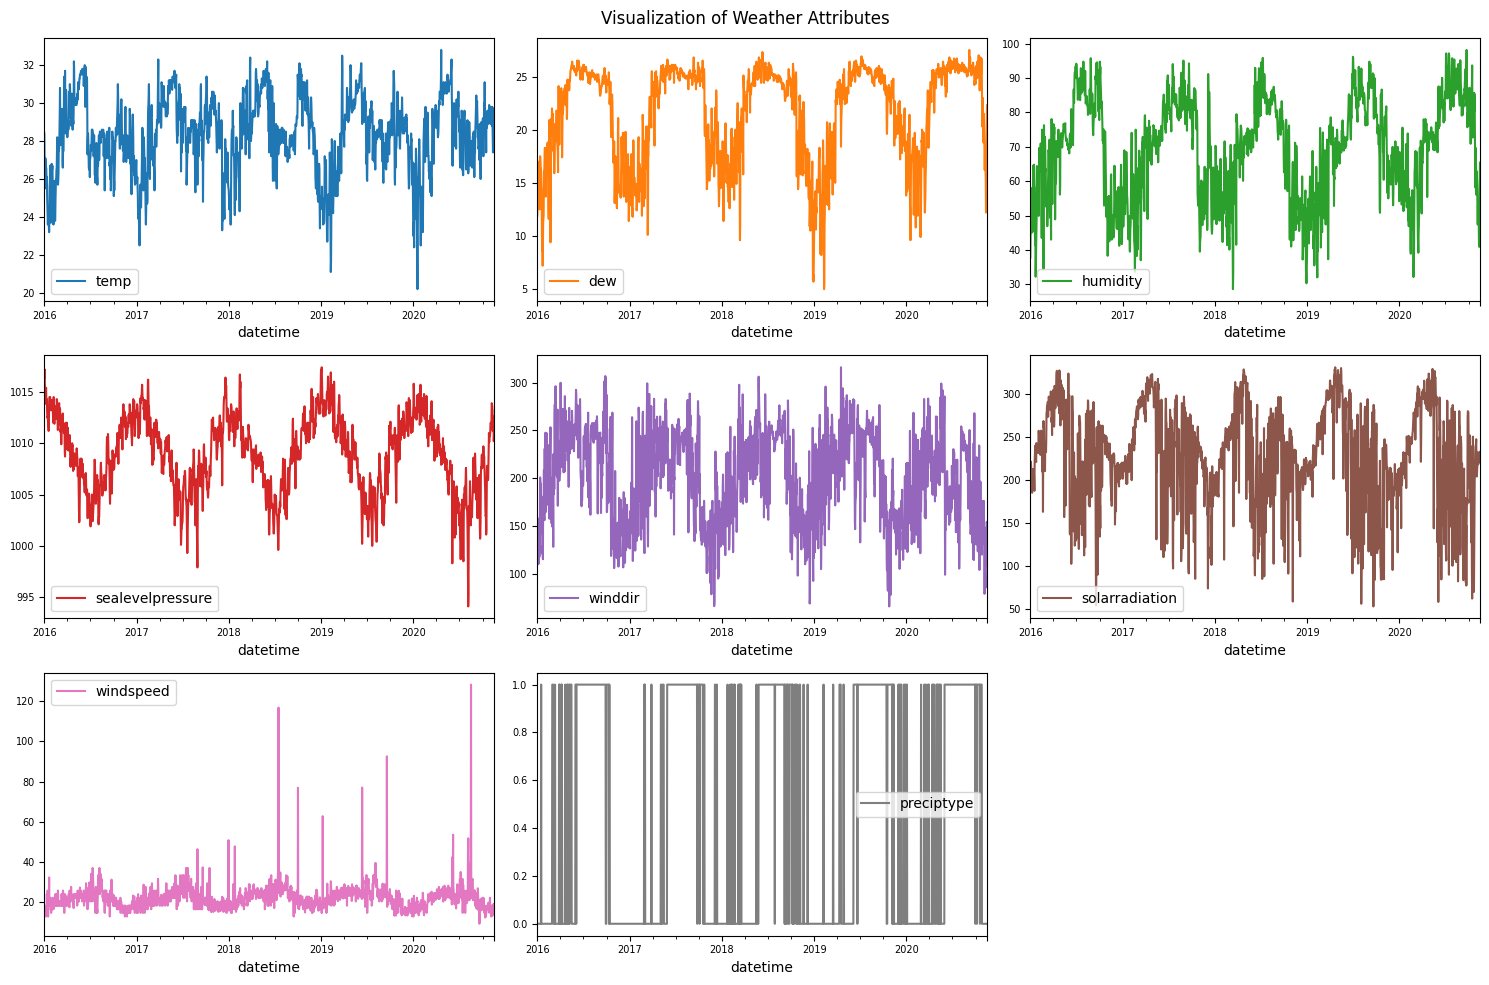

In [ ]:
df.plot(subplots=True,layout=(3, 3),figsize=(15,10),fontsize=7,linewidth=1.5,sharex=False,title='Visualization of Weather Attributes',)
plt.tight_layout()
plt.show()

In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

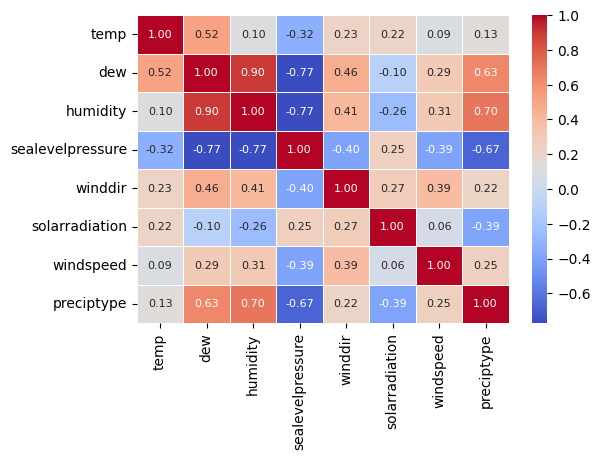

In [ ]:
corr = df.corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, fmt='.2f', linewidth=0.4,annot_kws={"size": 8}, cmap='coolwarm')
plt.show()

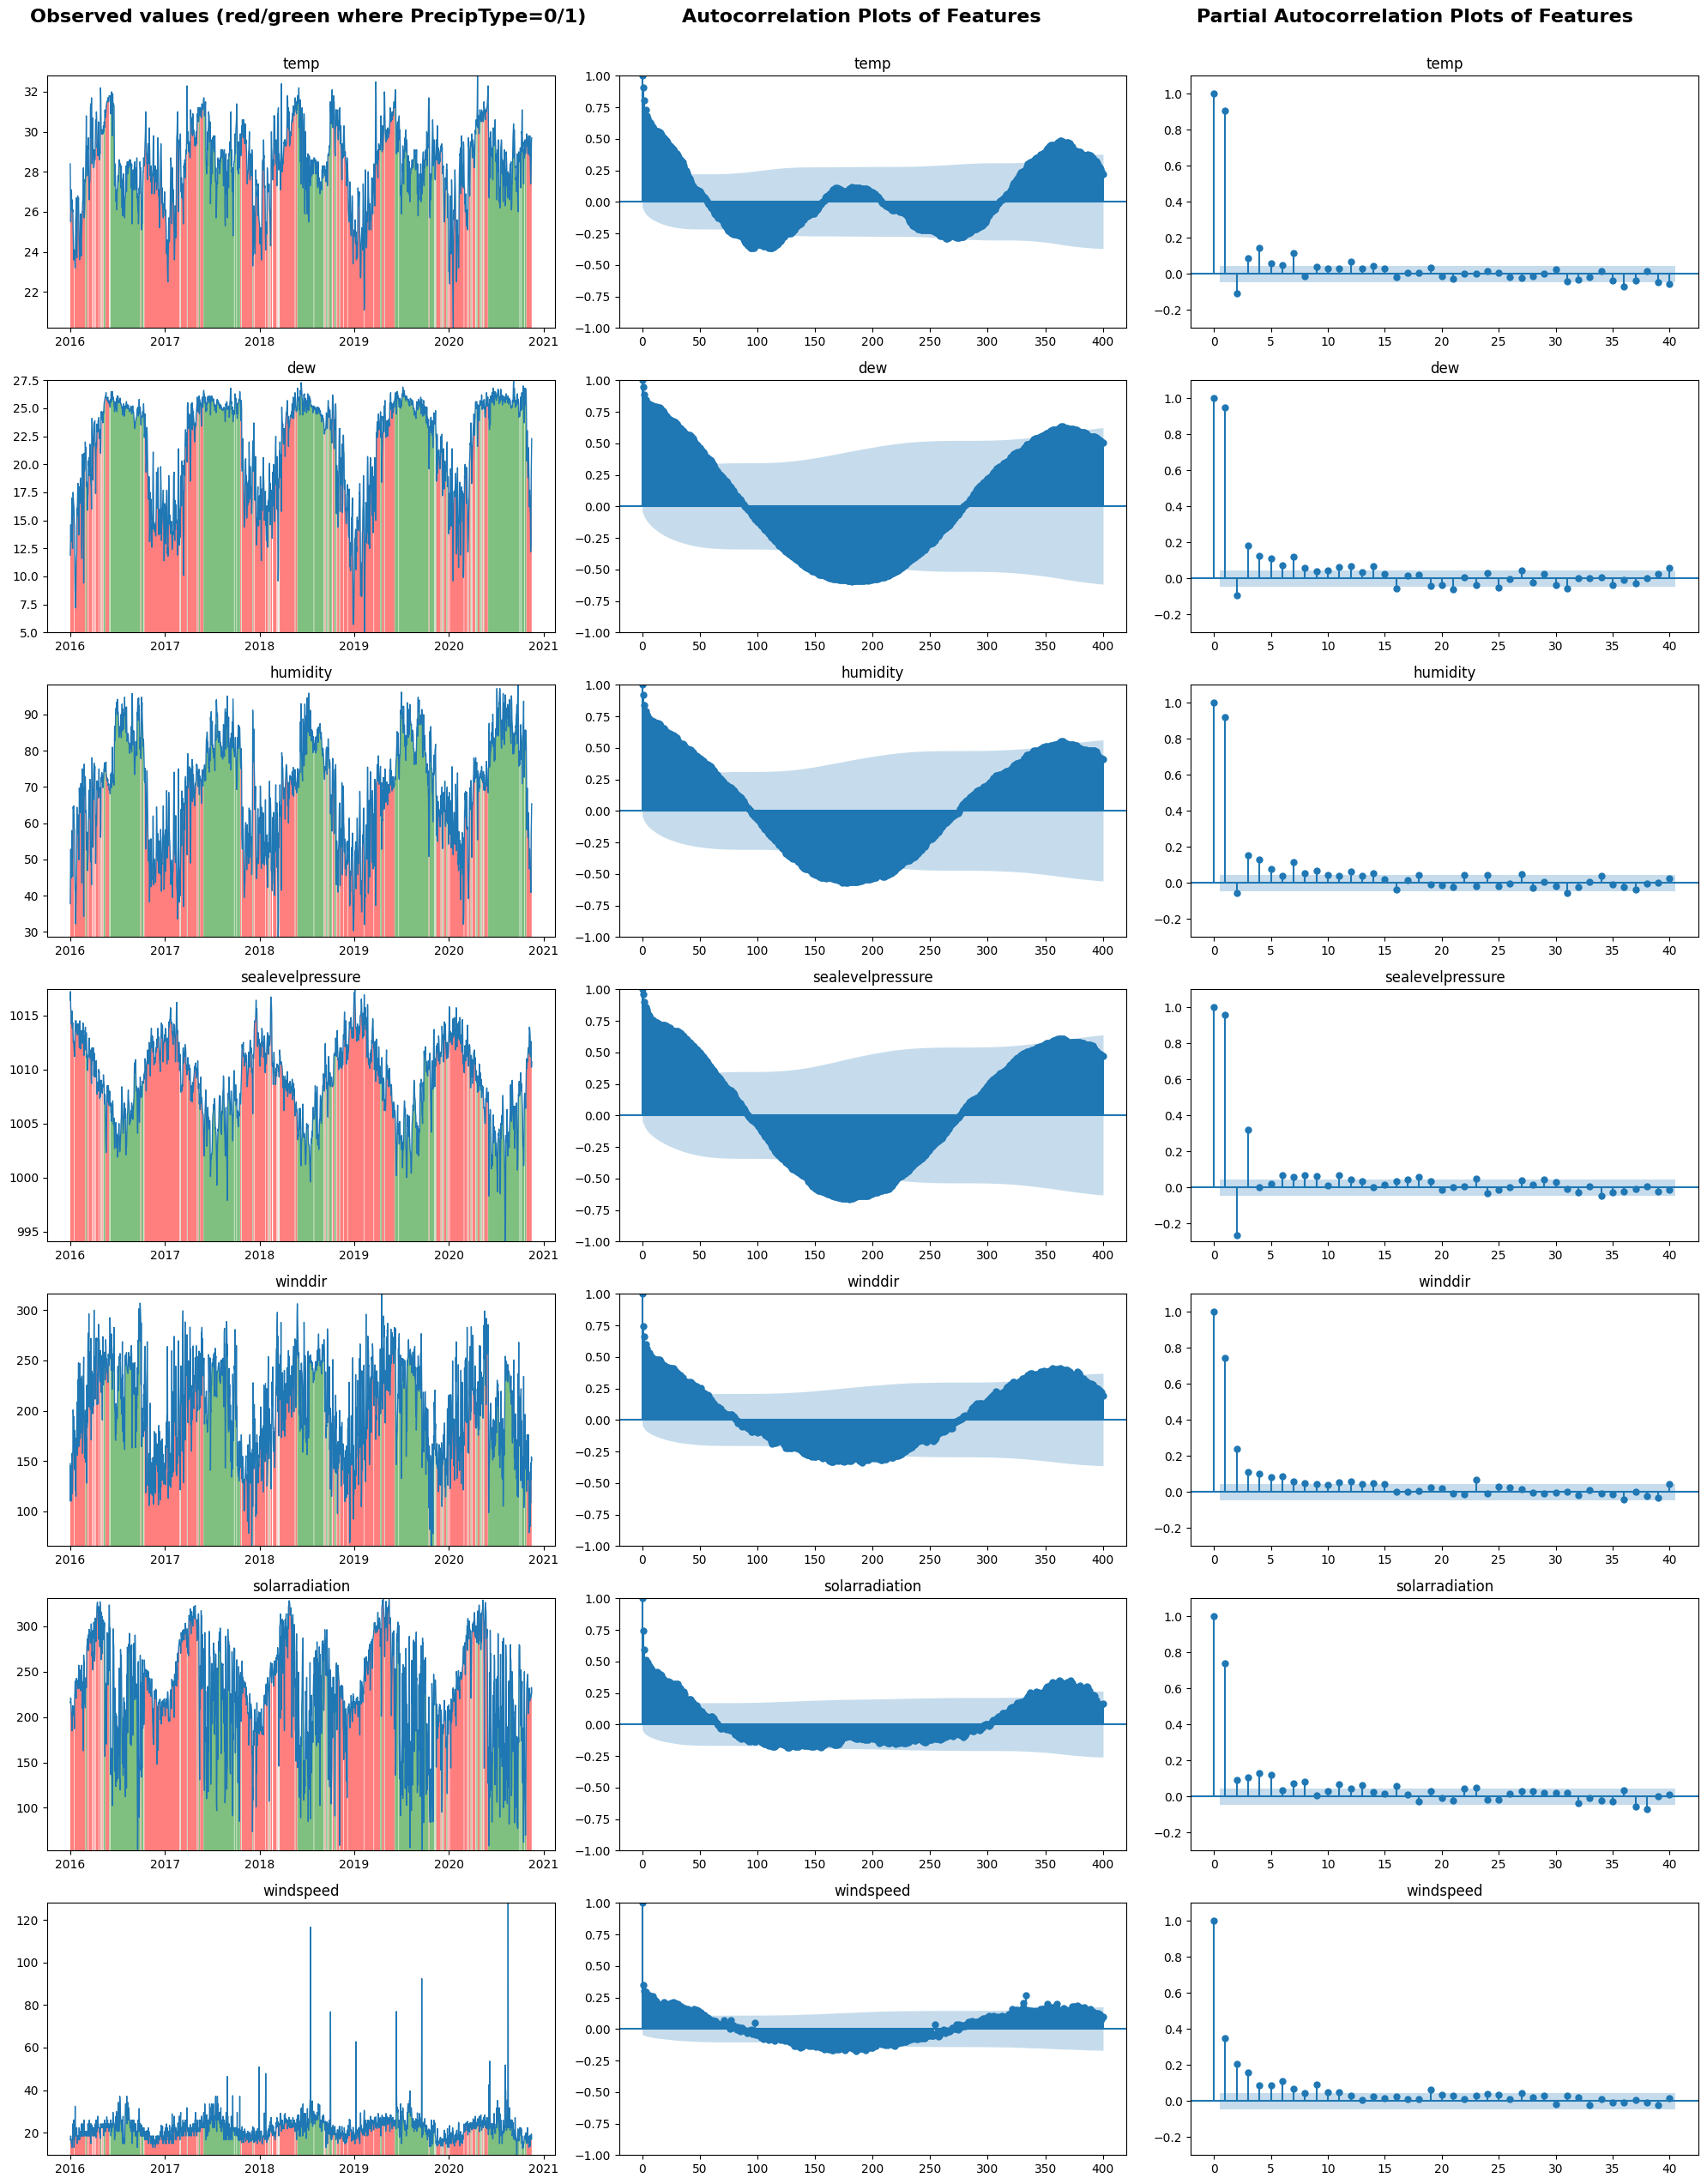

In [ ]:
fig, axes = plt.subplots(7,3, figsize=(20, 25))
fig.text(0.02, 1.01, 'Observed values (red/green where PrecipType=0/1)', ha='left', fontsize=16, fontweight='bold')
fig.text(0.4, 1.01, 'Autocorrelation Plots of Features', ha='left', fontsize=16, fontweight='bold')
fig.text(0.7, 1.01, 'Partial Autocorrelation Plots of Features', ha='left', fontsize=16, fontweight='bold')
for i, col in enumerate(df.columns[:-1]):
    axes[i,0].plot(df[col], linewidth=1)
    axes[i,0].set_ylim(df[col].min(), df[col].max())
    axes[i,0].set_title(col)
    axes[i,0].fill_between(df.index, df[col], where=(df.preciptype == 0), facecolor='red', alpha=0.5)
    axes[i,0].fill_between(df.index, df[col], where=(df.preciptype == 1), facecolor='green', alpha=0.5)
    tsaplots.plot_acf(df[col], lags=400, ax=axes[i,1])
    axes[i,1].set_title(col)
    tsaplots.plot_pacf(df[col], lags=40, ax=axes[i,2],)
    axes[i,2].set_title(col)
    axes[i,2].set_ylim(-0.3, 1.1)
plt.tight_layout()
plt.show()

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [ ]:
def create_sequences(x, y, time_steps=20):
    xseq, yseq = [], []
    for i in range(len(x) - time_steps):
        xseq.append(x[i:i+time_steps])
        yseq.append(y[i+time_steps])
    return np.array(xseq), np.array(yseq)

In [ ]:
df['seconds'] = df.index.map(pd.Timestamp.timestamp)
week_sec = 60*60*24*7
month_sec = 60*60*24*30.4375
df.insert(7,'Week_Sin', np.sin(2*np.pi*df['seconds']/week_sec))
df.insert(8,'Week_Cos', np.cos(2*np.pi*df['seconds']/week_sec))
df.insert(9,'Month_Sin', np.sin(2*np.pi*df['seconds']/month_sec))
df.insert(10,'Month_Cos', np.cos(2*np.pi*df['seconds']/month_sec))
df = df.drop('seconds',axis=1)
df.head()

,temp,dew,humidity,sealevelpressure,winddir,solarradiation,windspeed,Week_Sin,Week_Cos,Month_Sin,Month_Cos,preciptype
datetime,,,,,,,,,,,,
2016-01-01,28.4,11.9,37.8,1016.4,147.5,216.1,16.6,0.781831,0.623490,-0.103031,0.994678,0
2016-01-02,26.8,13.0,44.8,1017.2,110.3,215.7,16.6,0.974928,-0.222521,0.103031,0.994678,0
2016-01-03,25.5,14.6,52.8,1015.7,145.3,221.1,18.4,0.433884,-0.900969,0.304719,0.952442,0
2016-01-04,26.4,13.1,46.6,1015.3,126.9,216.2,16.6,-0.433884,-0.900969,0.493468,0.869764,0
2016-01-05,27.1,13.5,44.9,1014.4,125.5,208.1,16.6,-0.974928,-0.222521,0.661263,0.750154,0


In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
scaler = StandardScaler()
X = scaler.fit_transform(x)
xseq, yseq = create_sequences(X, y, 20)
trainX3, tempX3, trainY3, tempY3 = train_test_split(xseq, yseq, test_size=0.25, random_state=42,stratify=yseq)
validX3, testX3, validY3, testY3 = train_test_split(tempX3, tempY3, test_size=5/25, random_state=42,stratify=tempY3)

In [ ]:
import pickle
with open("StandardScaler.pkl","wb") as f:
  pickle.dump(scaler,f)

In [ ]:
model2 = Sequential([
    Bidirectional(LSTM(64,return_sequences=True),input_shape=(trainX3.shape[1],trainX3.shape[2])),
    Dropout(0.2),
    LSTM(64,return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)
history2 = model2.fit(trainX3, trainY3, epochs=1000, batch_size=32, validation_data=(validX3, validY3),workers=4,callbacks=early_stopping)

Epoch 1/1000
42/42 [==============================] - 12s 85ms/step - loss: 0.3844 - accuracy: 0.8568 - val_loss: 0.3347 - val_accuracy: 0.8835
Epoch 2/1000
42/42 [==============================] - 2s 53ms/step - loss: 0.2916 - accuracy: 0.8939 - val_loss: 0.3232 - val_accuracy: 0.8835
Epoch 3/1000
42/42 [==============================] - 3s 79ms/step - loss: 0.2740 - accuracy: 0.9015 - val_loss: 0.3068 - val_accuracy: 0.8864
Epoch 4/1000
42/42 [==============================] - 2s 48ms/step - loss: 0.2712 - accuracy: 0.9023 - val_loss: 0.2963 - val_accuracy: 0.8892
Epoch 5/1000
42/42 [==============================] - 2s 44ms/step - loss: 0.2626 - accuracy: 0.9000 - val_loss: 0.2893 - val_accuracy: 0.8835
Epoch 6/1000
42/42 [==============================] - 2s 44ms/step - loss: 0.2428 - accuracy: 0.9091 - val_loss: 0.3071 - val_accuracy: 0.8835
Epoch 7/1000
42/42 [==============================] - 2s 44ms/step - loss: 0.2381 - accuracy: 0.9152 - val_loss: 0.2721 - val_accuracy: 0.900

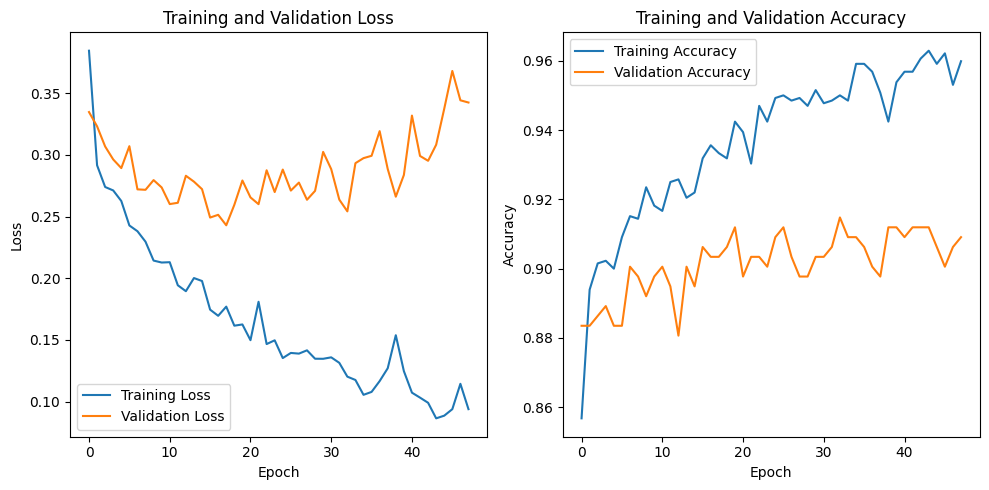

In [ ]:
def plot_loss_accuracy(history):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()
plot_loss_accuracy(history2)

In [ ]:
loss, accuracy = model2.evaluate(testX3, testY3)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy*100:.3f}%')

3/3 [==============================] - 2s 14ms/step - loss: 0.1801 - accuracy: 0.9551
Test Loss: 0.1801
Test Accuracy: 95.506%


3/3 [==============================] - 6s 17ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        48
           1       0.97      0.93      0.95        41

    accuracy                           0.96        89
   macro avg       0.96      0.95      0.95        89
weighted avg       0.96      0.96      0.95        89

Accuracy : 95.50561797752809%



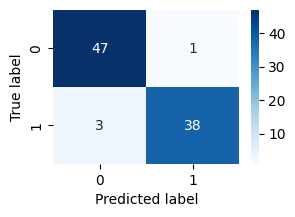

In [ ]:
ypredLSTM = model2.predict(testX3)
ypredLSTM = (ypredLSTM > 0.5).astype(int)
cm = confusion_matrix(testY3, ypredLSTM)
plt.figure(figsize=(3,2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
print(f"Classification Report:")
print(classification_report(testY3, ypredLSTM))
acc = accuracy_score(testY3, ypredLSTM)
print(f"Accuracy : {acc*100}%\n")

In [ ]:
#saving the trained model weights in a h5 weights file format
model2.save("LSTMModel_95.5.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
